# **Machine Learning**
## *Lab 04*

In [22]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### A1

In [23]:
def create_intensity_classes(df):
    # Define thresholds based on percentiles or domain knowledge
    low_threshold = df['max'].quantile(0.33)
    high_threshold = df['max'].quantile(0.66)
    
    # Create class labels
    conditions = [
        (df['max'] < low_threshold),
        (df['max'] >= low_threshold) & (df['max'] < high_threshold),
        (df['max'] >= high_threshold)
    ]
    class_labels = [0, 1, 2]  # or ['Low', 'Medium', 'High']
    
    return np.select(conditions, class_labels)
    
data = pd.read_csv("combined_seismic_data.csv")
data["class"] = create_intensity_classes(data)

class_1_and_2 = data[data['class'].isin([1, 2])]

# Extract features and labels again after filtering
X = class_1_and_2[['max', 'distance_to_event']].values
y = class_1_and_2['class'].values

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

filename = "Lab03_KNN.pkl"
loaded_model = pickle.load(open(filename, 'rb'))
# Make predictions on the training and test sets
y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

# Confusion Matrix for both training and test sets
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print("Training Confusion Matrix:")
print(train_confusion_matrix)
print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Confusion Matrix:
[[200   0]
 [  0 197]]

Test Confusion Matrix:
[[80  0]
 [ 1 90]]

Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       197

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


Test Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        80
           2       1.00      0.99      0.99        91

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Given that the model performs almost perfectly on both the training and test data, with only a very small drop in performance on the test set, the model is most likely regular-fit (well-generalized).

It is not underfitting because the model is achieving near-perfect results on both training and test data. It is also not overfitting because the performance drop from training to test data is minimal and within acceptable ranges.

### A2

In [24]:
data = np.load("payements_true_predicted.npz")
true_data = data['arr_0']
predicted_data = data['arr_1']

In [25]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [26]:
print("MSE: ", mse(true_data, predicted_data))
print("RMSE: ", rmse(true_data, predicted_data))
print("MAPE: ", mape(true_data, predicted_data))
print("R2: ", r2(true_data, predicted_data))

MSE:  6.664296927307107e-28
RMSE:  2.5815299586305613e-14
MAPE:  4.210920741310997e-15
R2:  1.0


We see that all the values are nearly 0. Thus, it is an accurate model.

### A3

Generated Data:
           X         Y  Class
0   2.794021  9.539072      1
1   2.751098  9.723387      1
2   6.150988  2.768890      0
3   3.316542  7.085660      1
4   3.359011  6.001209      1
5   1.589732  9.237257      1
6   3.474290  8.726618      1
7   4.929774  6.562814      1
8   2.993207  4.803703      1
9   9.951057  6.416653      0
10  7.414347  9.848709      1
11  1.226742  1.523556      1
12  1.382787  4.407397      1
13  6.151307  4.329128      0
14  6.088565  4.206655      0
15  1.445249  9.489158      1
16  2.624563  8.908155      1
17  6.235109  2.643684      0
18  9.875273  7.695026      0
19  8.224976  8.424575      1


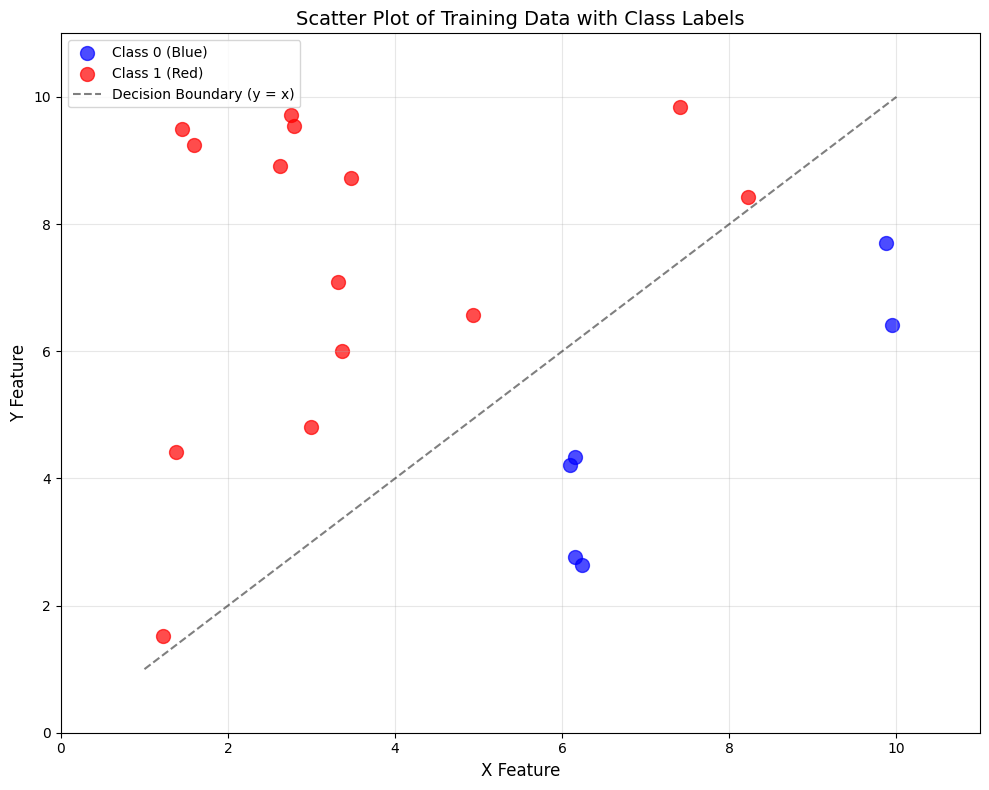


Class Distribution:
Class 0 (Blue): 6 points
Class 1 (Red): 14 points


In [27]:
def generate_data():
    # Generate X and Y values randomly between 1 and 10
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    
    classes = []
    for i in range(20):
        if Y[i] > X[i]:
            classes.append(1)  # Red
        else:
            classes.append(0)  # Blue
    
    # Create a DataFrame to store the data
    df = pd.DataFrame({
        'X': X,
        'Y': Y,
        'Class': classes
    })
    
    return df

# Generate the data
data = generate_data()

# Display the data
print("Generated Data:")
print(data)

# Plot the data
plt.figure(figsize=(10, 8))
colors = ['blue', 'red']
labels = ['Class 0 (Blue)', 'Class 1 (Red)']

# Separate the classes for plotting
class0 = data[data['Class'] == 0]
class1 = data[data['Class'] == 1]

# Plot each class with a different color
plt.scatter(class0['X'], class0['Y'], c='blue', label='Class 0 (Blue)', s=100, alpha=0.7)
plt.scatter(class1['X'], class1['Y'], c='red', label='Class 1 (Red)', s=100, alpha=0.7)

# Add a line showing the decision boundary (y = x in this case)
plt.plot([1, 10], [1, 10], 'k--', alpha=0.5, label='Decision Boundary (y = x)')

# Add labels and title
plt.xlabel('X Feature', fontsize=12)
plt.ylabel('Y Feature', fontsize=12)
plt.title('Scatter Plot of Training Data with Class Labels', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Set axis limits
plt.xlim(0, 11)
plt.ylim(0, 11)

plt.tight_layout()
plt.show()

# Count the number of points in each class
class_counts = data['Class'].value_counts().sort_index()
print("\nClass Distribution:")
print(f"Class 0 (Blue): {class_counts[0]} points")
print(f"Class 1 (Red): {class_counts[1]} points")

### A4

Training Data Summary:
Number of points: 20
Class 0 (Blue): 15
Class 1 (Red): 5

Test Data Summary:
Number of points: 10201
Predicted Class 0 (Blue): 8057
Predicted Class 1 (Red): 2144


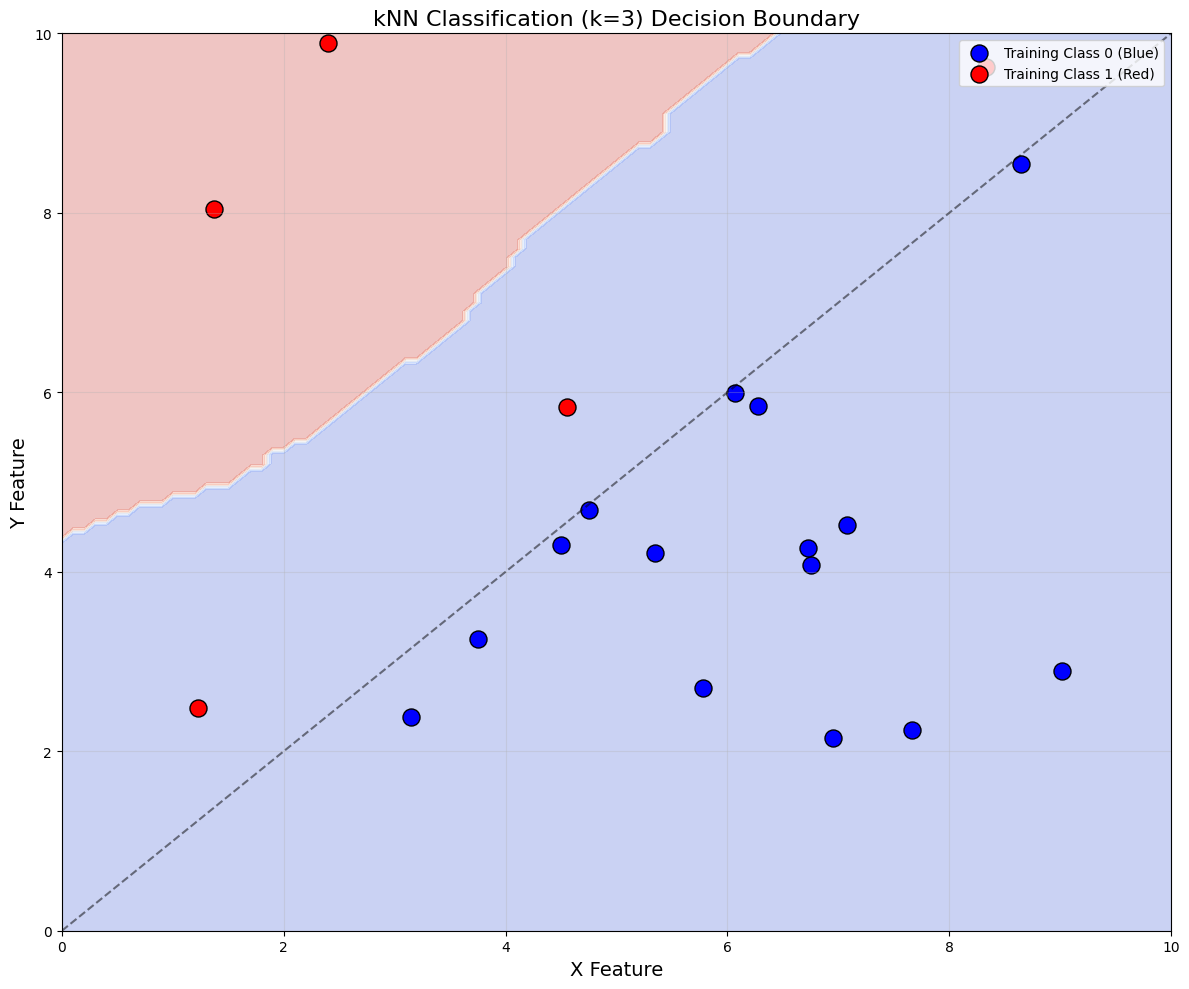

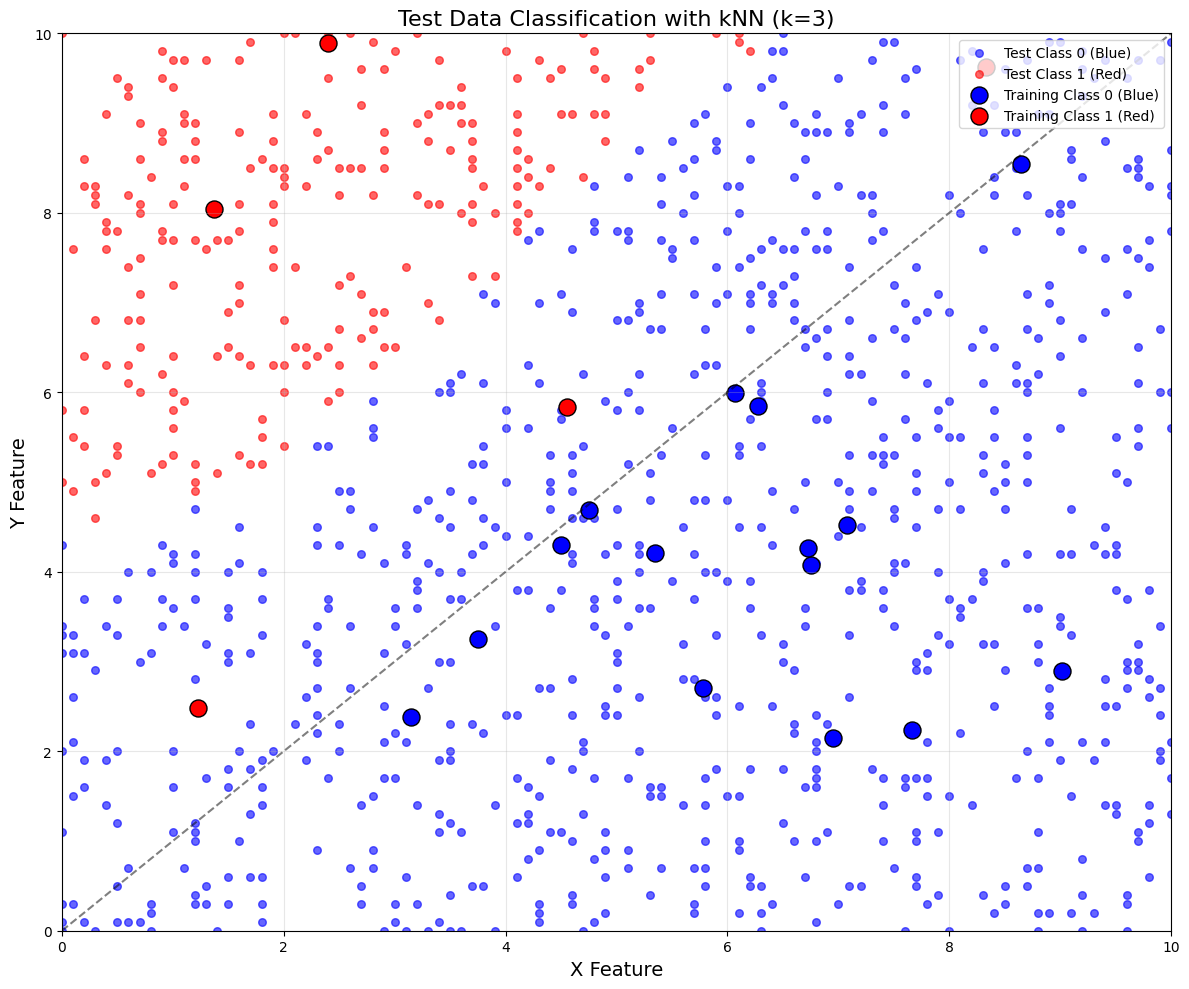

In [28]:
def generate_training_data():
    # Generate X and Y values randomly between 1 and 10
    X = np.random.uniform(1, 10, 20)
    Y = np.random.uniform(1, 10, 20)
    
    # Assign classes based on a simple rule: if y > x, then class 1 (Red), else class 0 (Blue)
    classes = []
    for i in range(20):
        if Y[i] > X[i]:
            classes.append(1)  # Red
        else:
            classes.append(0)  # Blue
    
    # Create a DataFrame to store the data
    df = pd.DataFrame({
        'X': X,
        'Y': Y,
        'Class': classes
    })
    
    return df

def generate_test_data():
    # Create a grid of points from 0 to 10 with 0.1 increments
    x = np.arange(0, 10.1, 0.1)
    y = np.arange(0, 10.1, 0.1)
    
    # Create all combinations of x and y
    X, Y = np.meshgrid(x, y)
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    
    # Create a DataFrame to store the test data
    test_df = pd.DataFrame({
        'X': X_flat,
        'Y': Y_flat
    })
    
    return test_df, X, Y

def knn_classification(train_df, test_df, k=3):
    # Extract features and target from training data
    X_train = train_df[['X', 'Y']].values
    y_train = train_df['Class'].values
    
    # Create and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    X_test = test_df[['X', 'Y']].values
    y_pred = knn.predict(X_test)
    
    # Add predictions to the test DataFrame
    test_df['Predicted_Class'] = y_pred
    
    return test_df, knn

def visualize_results(train_df, test_df, X_grid, Y_grid):
    plt.figure(figsize=(12, 10))
    
    # Create a meshgrid for coloring the decision regions
    predictions = test_df['Predicted_Class'].values
    Z = predictions.reshape(X_grid.shape)
    
    # Plot the decision boundary
    plt.contourf(X_grid, Y_grid, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot the training data
    class0 = train_df[train_df['Class'] == 0]
    class1 = train_df[train_df['Class'] == 1]
    
    plt.scatter(class0['X'], class0['Y'], c='blue', edgecolors='k', s=150, marker='o', label='Training Class 0 (Blue)')
    plt.scatter(class1['X'], class1['Y'], c='red', edgecolors='k', s=150, marker='o', label='Training Class 1 (Red)')
    
    # Add labels and title
    plt.xlabel('X Feature', fontsize=14)
    plt.ylabel('Y Feature', fontsize=14)
    plt.title('kNN Classification (k=3) Decision Boundary', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')
    
    # Set axis limits
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    # Add a reference line for y = x
    plt.plot([0, 10], [0, 10], 'k--', alpha=0.5, label='y = x line')
    
    plt.tight_layout()
    
    # Create a separate figure for a small sample of test points
    plt.figure(figsize=(12, 10))
    
    # Sample test points for visualization (to avoid plotting all 10,000+ points)
    sample_size = 1000
    test_sample = test_df.sample(sample_size, random_state=42)
    
    # Plot the sampled test points
    test_class0 = test_sample[test_sample['Predicted_Class'] == 0]
    test_class1 = test_sample[test_sample['Predicted_Class'] == 1]
    
    plt.scatter(test_class0['X'], test_class0['Y'], c='blue', s=30, alpha=0.6, label='Test Class 0 (Blue)')
    plt.scatter(test_class1['X'], test_class1['Y'], c='red', s=30, alpha=0.6, label='Test Class 1 (Red)')
    
    # Plot the training data on top
    plt.scatter(class0['X'], class0['Y'], c='blue', edgecolors='k', s=150, marker='o', label='Training Class 0 (Blue)')
    plt.scatter(class1['X'], class1['Y'], c='red', edgecolors='k', s=150, marker='o', label='Training Class 1 (Red)')
    
    # Plot the y = x line
    plt.plot([0, 10], [0, 10], 'k--', alpha=0.5)
    
    # Add labels and title
    plt.xlabel('X Feature', fontsize=14)
    plt.ylabel('Y Feature', fontsize=14)
    plt.title('Test Data Classification with kNN (k=3)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')
    
    # Set axis limits
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    plt.tight_layout()


train_data = generate_training_data()
test_data, X_grid, Y_grid = generate_test_data()
classified_test_data, knn_model = knn_classification(train_data, test_data, k=3)


print("Training Data Summary:")
print(f"Number of points: {len(train_data)}")
print(f"Class 0 (Blue): {len(train_data[train_data['Class'] == 0])}")
print(f"Class 1 (Red): {len(train_data[train_data['Class'] == 1])}")
print("\nTest Data Summary:")
print(f"Number of points: {len(test_data)}")
print(f"Predicted Class 0 (Blue): {len(classified_test_data[classified_test_data['Predicted_Class'] == 0])}")
print(f"Predicted Class 1 (Red): {len(classified_test_data[classified_test_data['Predicted_Class'] == 1])}")

# Visualize results
visualize_results(train_data, classified_test_data, X_grid, Y_grid)

# Show plots
plt.show()

### A5

Training Data Summary:
Number of points: 20
Class 0 (Blue): 12
Class 1 (Red): 8

Test Data Summary:
k=1:
  Predicted Class 0 (Blue): 5235
  Predicted Class 1 (Red): 4966
k=3:
  Predicted Class 0 (Blue): 5637
  Predicted Class 1 (Red): 4564
k=5:
  Predicted Class 0 (Blue): 5043
  Predicted Class 1 (Red): 5158
k=7:
  Predicted Class 0 (Blue): 5501
  Predicted Class 1 (Red): 4700
k=9:
  Predicted Class 0 (Blue): 5934
  Predicted Class 1 (Red): 4267
k=11:
  Predicted Class 0 (Blue): 6151
  Predicted Class 1 (Red): 4050
k=15:
  Predicted Class 0 (Blue): 8041
  Predicted Class 1 (Red): 2160
k=19:
  Predicted Class 0 (Blue): 10201
  Predicted Class 1 (Red): 0


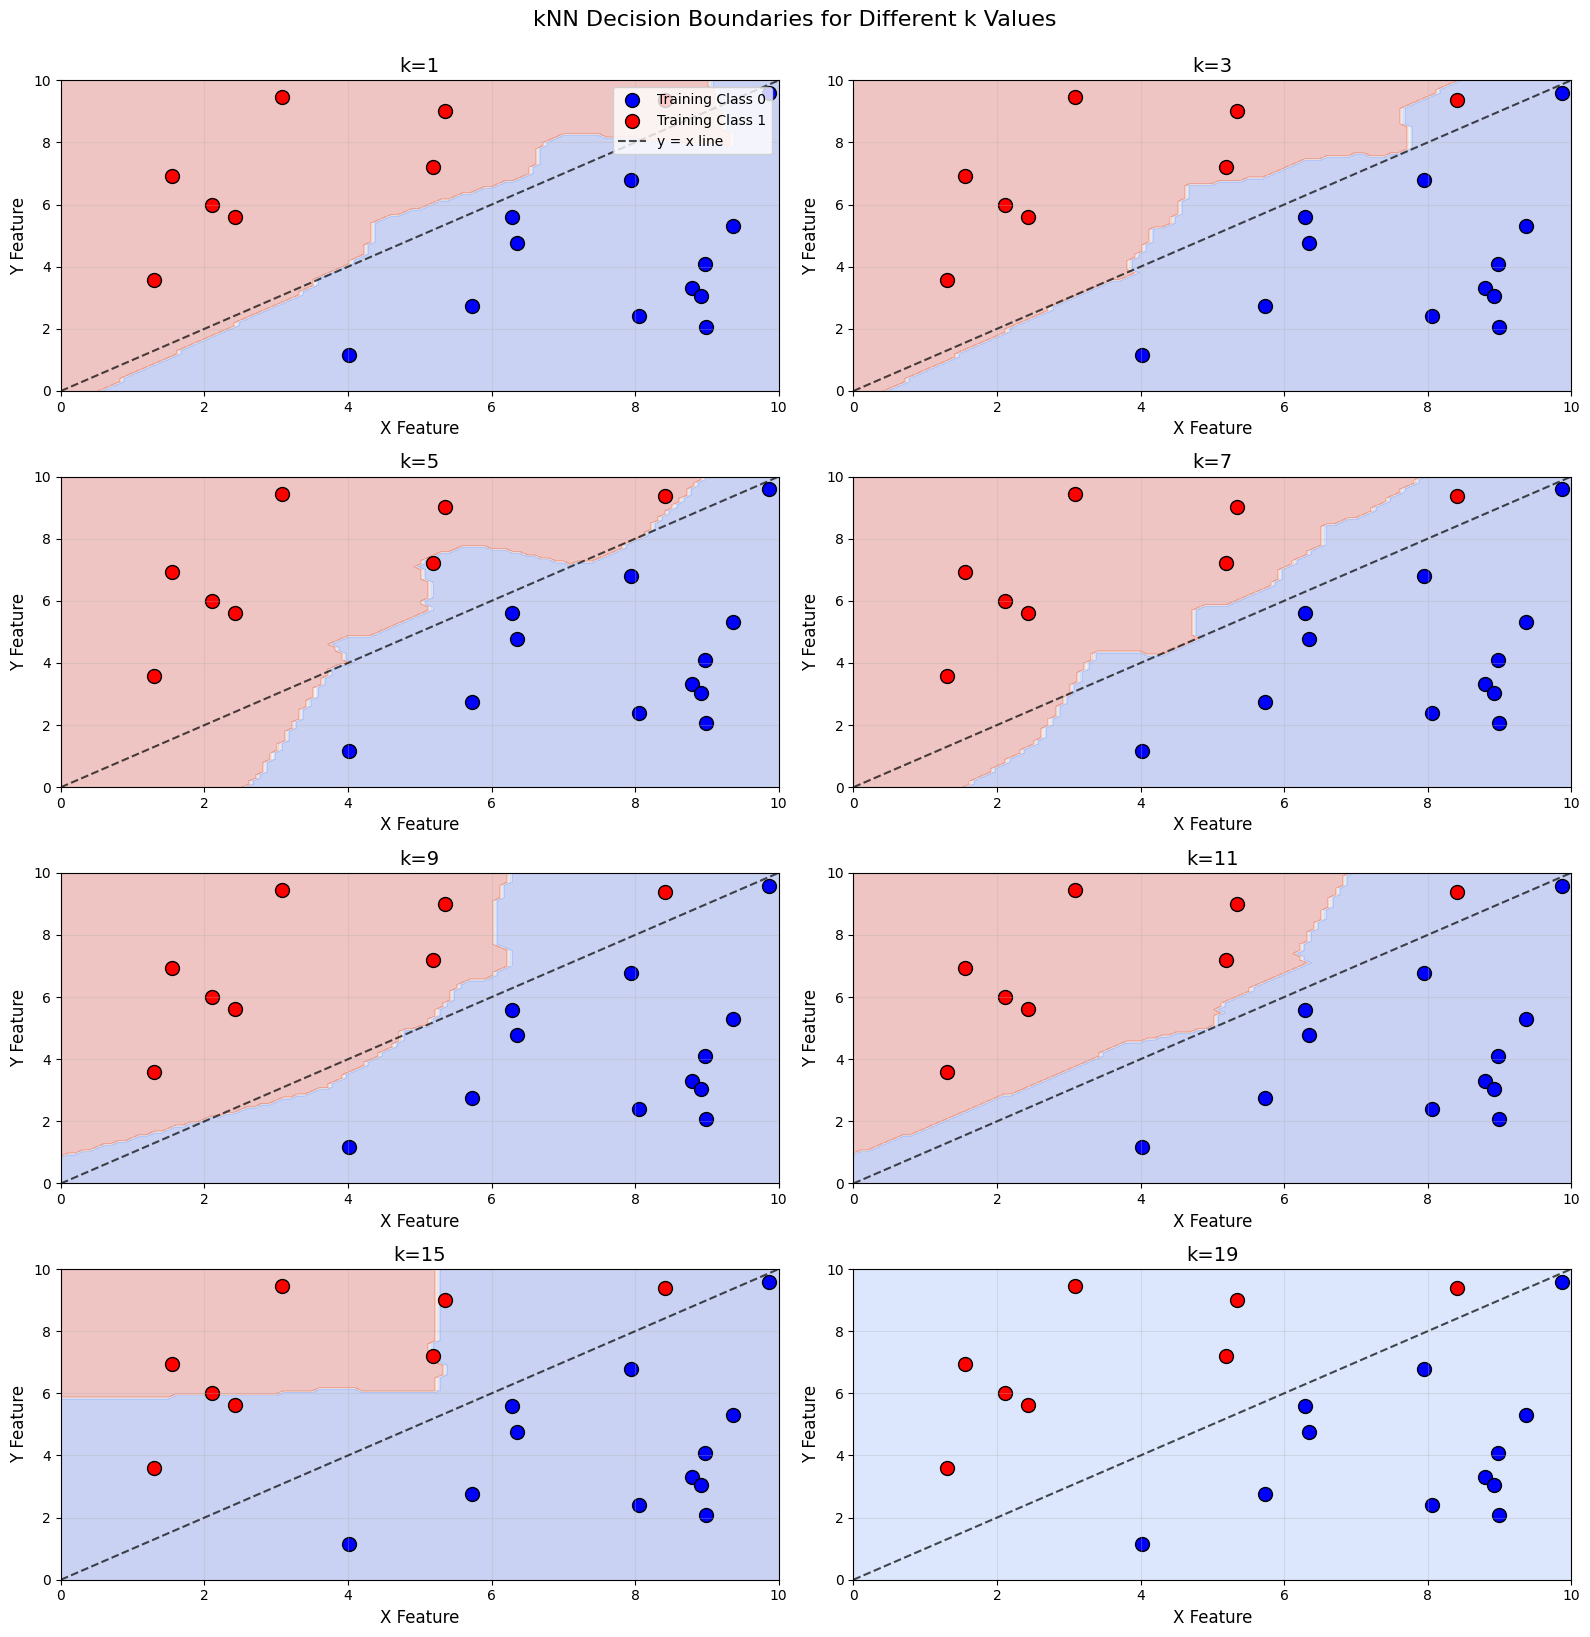

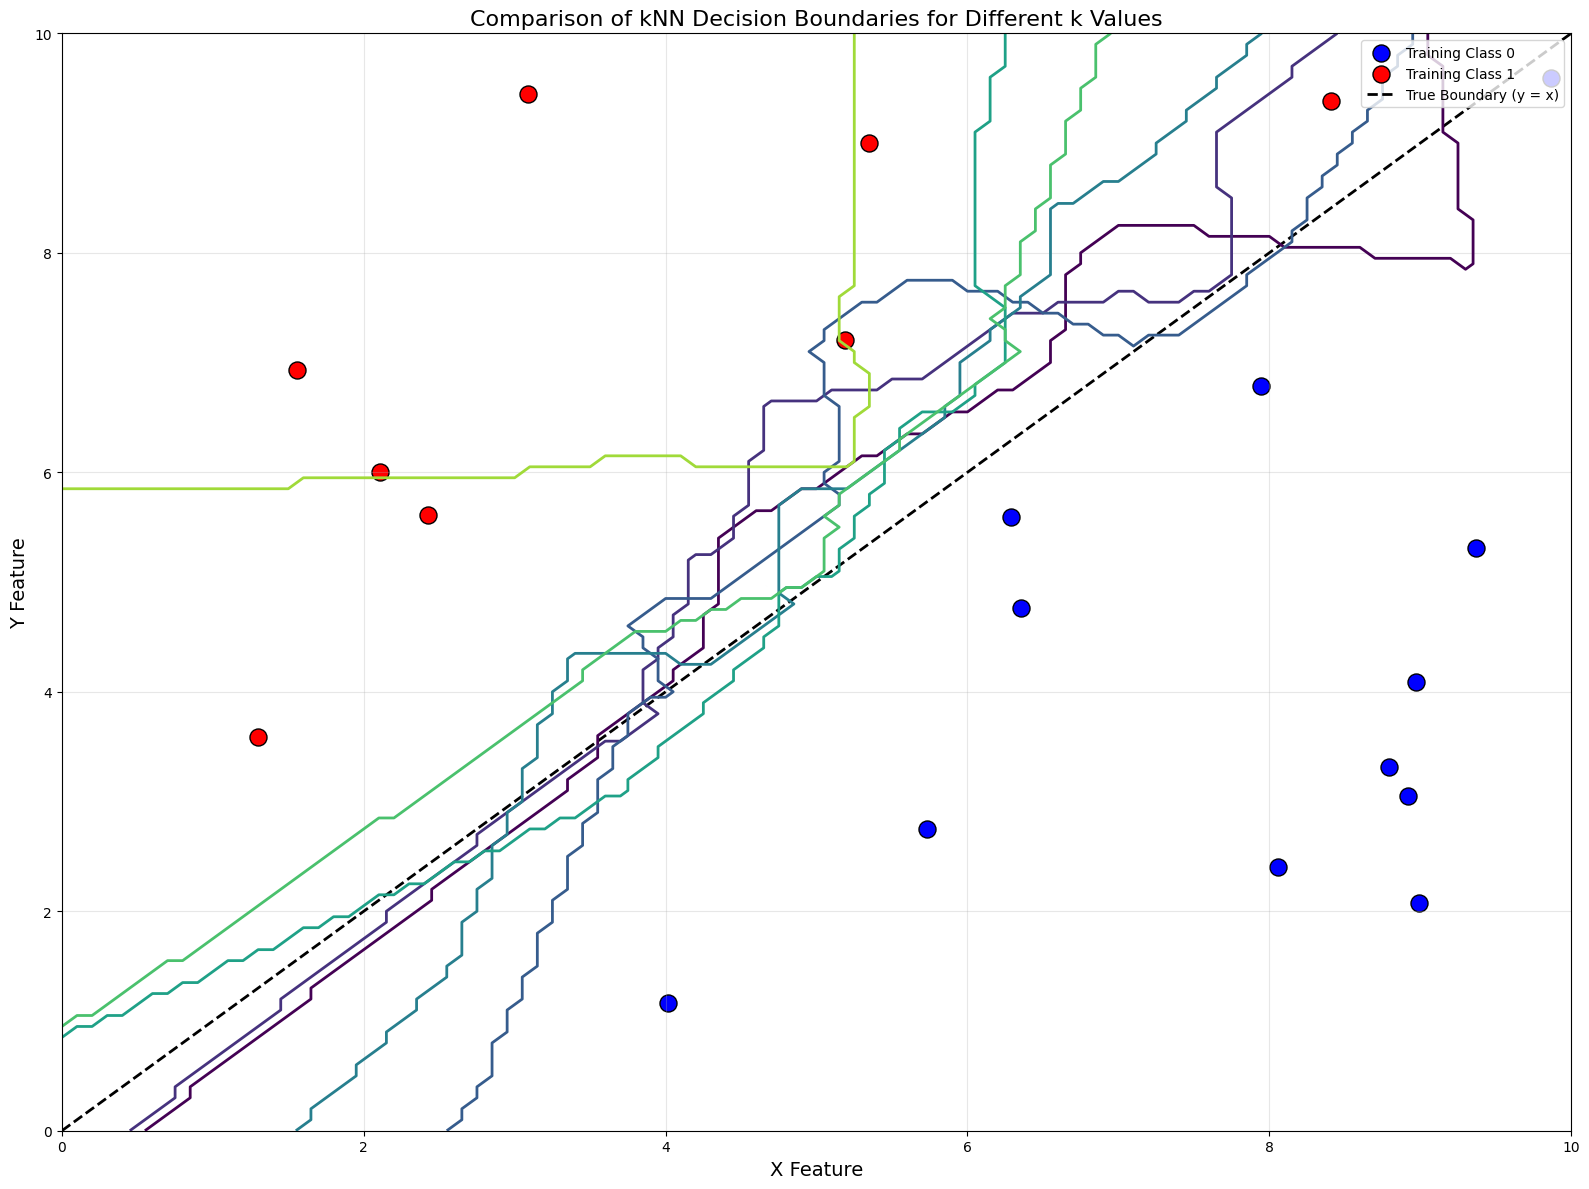

In [29]:
def knn_classification(train_df, test_df, k):
    # Extract features and target from training data
    X_train = train_df[['X', 'Y']].values
    y_train = train_df['Class'].values
    
    # Create and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    X_test = test_df[['X', 'Y']].values
    y_pred = knn.predict(X_test)
    
    # Add predictions to the test DataFrame
    test_df[f'Predicted_Class_k{k}'] = y_pred
    
    return test_df, knn

# Step 4: Visualize the results for multiple k values
def visualize_results_for_multiple_k(train_df, test_df, X_grid, Y_grid, k_values):
    # Create a figure for the multiple subplots
    fig, axes = plt.subplots(len(k_values)//2 + len(k_values)%2, 2, figsize=(16, 4*len(k_values)//2 + 4*len(k_values)%2))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    for i, k in enumerate(k_values):
        # Get the predictions for the current k value
        pred_col = f'Predicted_Class_k{k}'
        predictions = test_df[pred_col].values
        Z = predictions.reshape(X_grid.shape)
        
        # Plot the decision boundary
        im = axes[i].contourf(X_grid, Y_grid, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        
        # Plot the training data
        class0 = train_df[train_df['Class'] == 0]
        class1 = train_df[train_df['Class'] == 1]
        
        axes[i].scatter(class0['X'], class0['Y'], c='blue', edgecolors='k', s=100, marker='o', label='Training Class 0')
        axes[i].scatter(class1['X'], class1['Y'], c='red', edgecolors='k', s=100, marker='o', label='Training Class 1')
        
        # Add a reference line for y = x (the true boundary)
        axes[i].plot([0, 10], [0, 10], 'k--', alpha=0.7, label='y = x line')
        
        # Add labels
        axes[i].set_xlabel('X Feature', fontsize=12)
        axes[i].set_ylabel('Y Feature', fontsize=12)
        axes[i].set_title(f'k={k}', fontsize=14)
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlim(0, 10)
        axes[i].set_ylim(0, 10)
        
        # Only add legend to the first plot to avoid cluttering
        if i == 0:
            axes[i].legend(loc='upper right')
    
    # Remove any empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.suptitle('kNN Decision Boundaries for Different k Values', fontsize=16, y=1.02)
    
    # Create a more detailed figure showing the evolution of the boundary as k increases
    plt.figure(figsize=(16, 12))
    
    # Use a colormap to distinguish different k values
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0, 1, len(k_values)))
    
    # Plot the training data
    class0 = train_df[train_df['Class'] == 0]
    class1 = train_df[train_df['Class'] == 1]
    
    plt.scatter(class0['X'], class0['Y'], c='blue', edgecolors='k', s=150, marker='o', label='Training Class 0')
    plt.scatter(class1['X'], class1['Y'], c='red', edgecolors='k', s=150, marker='o', label='Training Class 1')
    
    # Plot the y = x line (true boundary)
    plt.plot([0, 10], [0, 10], 'k--', linewidth=2, label='True Boundary (y = x)')
    
    # Create a grid for extracting contours
    plt.grid(True, alpha=0.3)
    
    # Plot the decision boundary contours for each k
    for i, k in enumerate(k_values):
        pred_col = f'Predicted_Class_k{k}'
        predictions = test_df[pred_col].values
        Z = predictions.reshape(X_grid.shape)
        
        # Plot the contour line where Z = 0.5 (the decision boundary)
        contour = plt.contour(X_grid, Y_grid, Z, levels=[0.5], colors=[colors[i]], linewidths=2)
    
    plt.xlabel('X Feature', fontsize=14)
    plt.ylabel('Y Feature', fontsize=14)
    plt.title('Comparison of kNN Decision Boundaries for Different k Values', fontsize=16)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.legend(loc='upper right')
    
    plt.tight_layout()

# Main execution
train_data = generate_training_data()
test_data, X_grid, Y_grid = generate_test_data()

# Define a range of k values to test
k_values = [1, 3, 5, 7, 9, 11, 15, 19]

# Perform classification with different k values
for k in k_values:
    test_data, _ = knn_classification(train_data, test_data, k)

# Print summary
print("Training Data Summary:")
print(f"Number of points: {len(train_data)}")
print(f"Class 0 (Blue): {len(train_data[train_data['Class'] == 0])}")
print(f"Class 1 (Red): {len(train_data[train_data['Class'] == 1])}")
print("\nTest Data Summary:")
for k in k_values:
    pred_col = f'Predicted_Class_k{k}'
    print(f"k={k}:")
    print(f"  Predicted Class 0 (Blue): {len(test_data[test_data[pred_col] == 0])}")
    print(f"  Predicted Class 1 (Red): {len(test_data[test_data[pred_col] == 1])}")

# Visualize results for multiple k values
visualize_results_for_multiple_k(train_data, test_data, X_grid, Y_grid, k_values)
plt.show()

### A6

Class Distribution:
Class 0 (Low): 280 samples
Class 1 (Medium): 280 samples
Class 2 (High): 288 samples


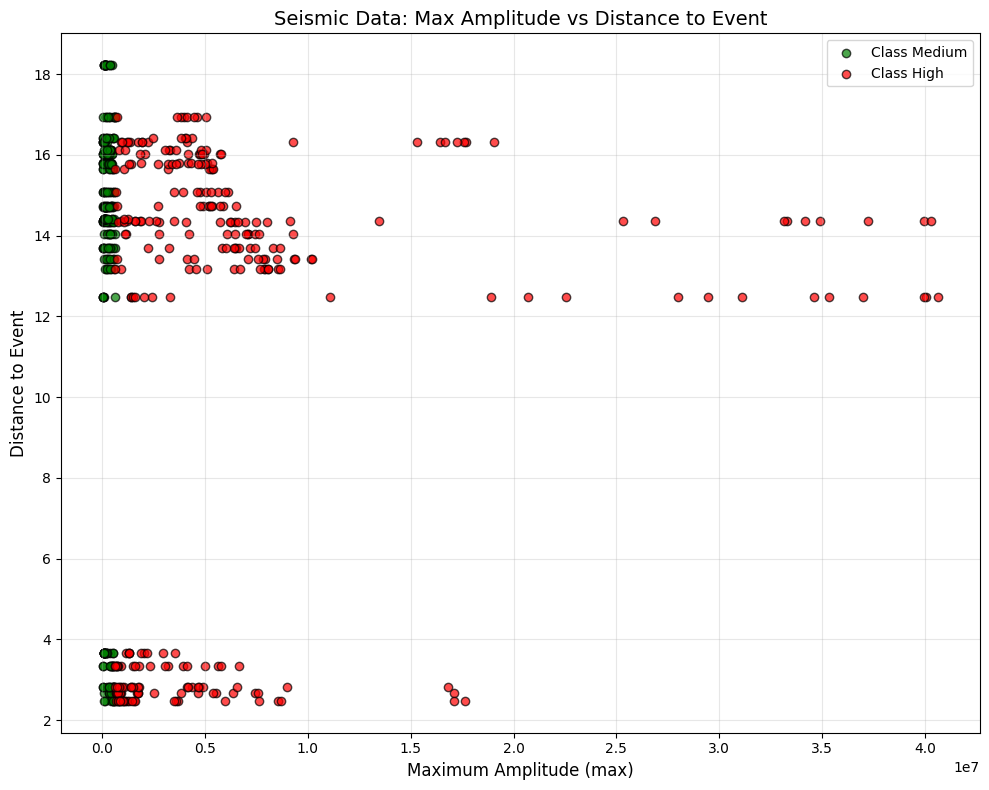

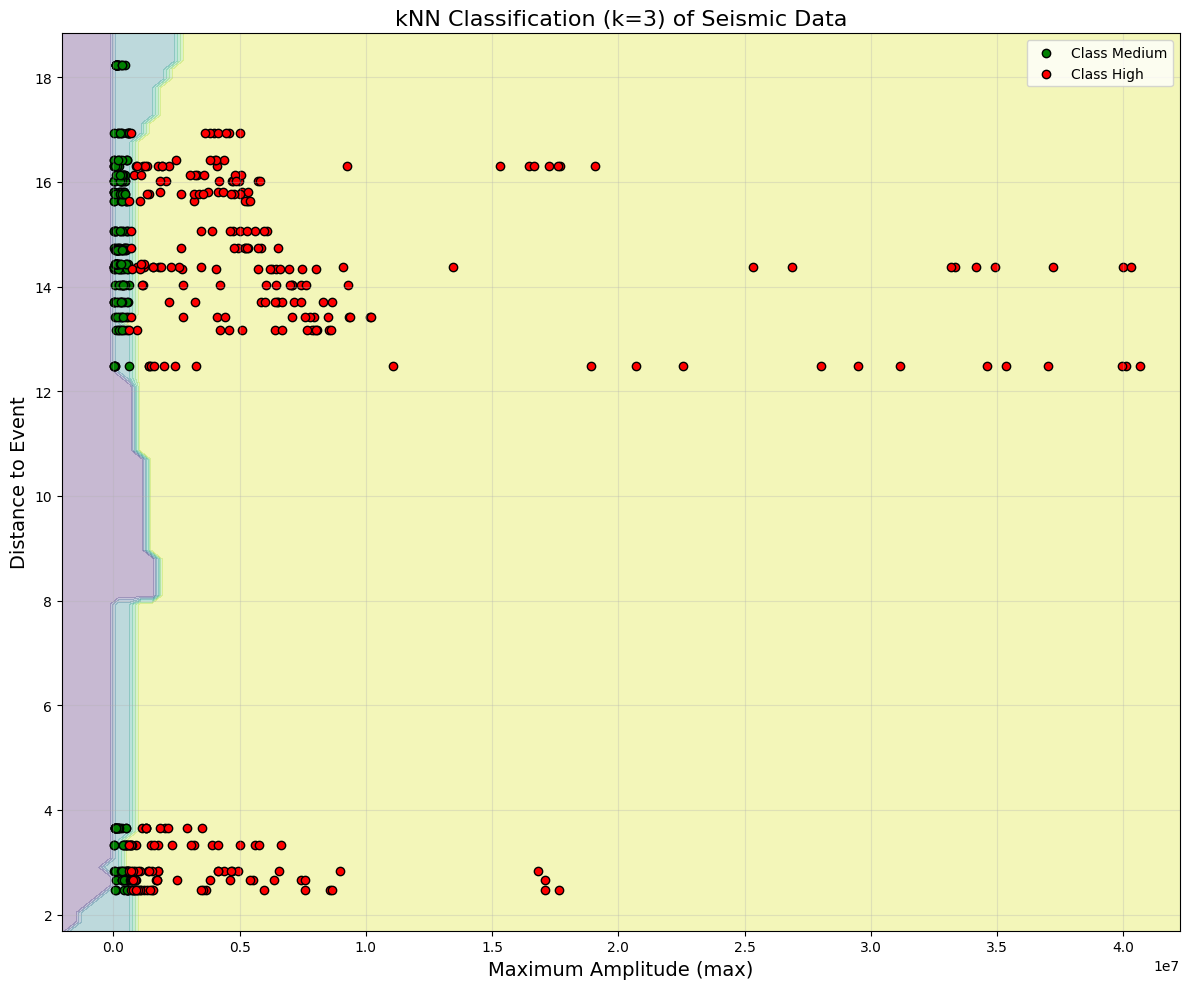

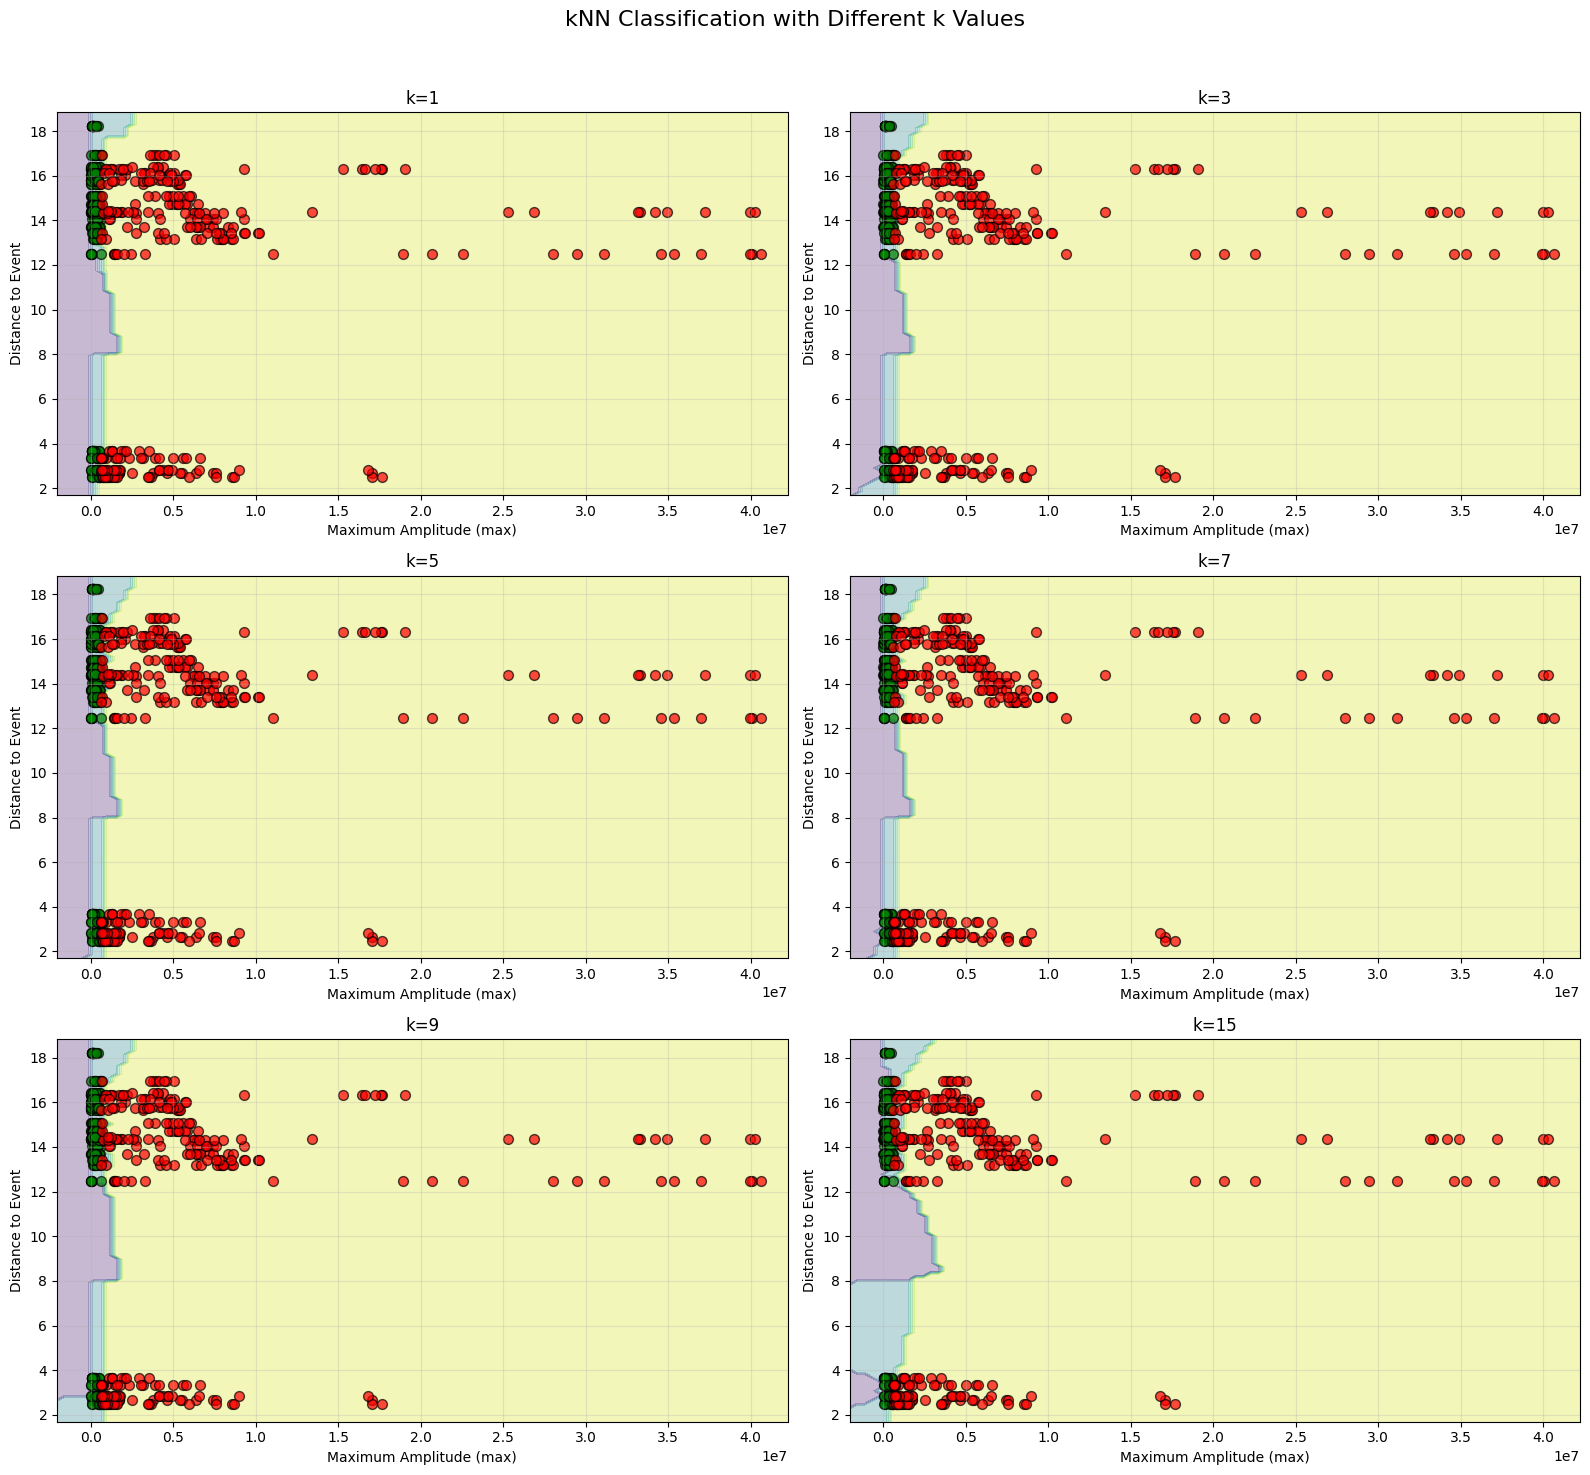

In [30]:
# A3: Make a scatter plot of the training data colored by class
def plot_training_data(data):
    plt.figure(figsize=(10, 8))
    
    # Scatter plot with colors based on class
    for class_label, color, label in zip([1, 2], ['green', 'red'], ['Medium', 'High']):
        mask = data['class'] == class_label
        plt.scatter(
            data.loc[mask, 'max'], 
            data.loc[mask, 'distance_to_event'],
            c=color, 
            label=f'Class {label}',
            alpha=0.7,
            edgecolors='k'
        )
    
    # Add labels and title
    plt.xlabel('Maximum Amplitude (max)', fontsize=12)
    plt.ylabel('Distance to Event', fontsize=12)
    plt.title('Seismic Data: Max Amplitude vs Distance to Event', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    
    # Display class distribution
    class_counts = data['class'].value_counts().sort_index()
    print("Class Distribution:")
    for i, count in enumerate(class_counts):
        class_name = ['Low', 'Medium', 'High'][i]
        print(f"Class {i} ({class_name}): {count} samples")
    
    return plt

# A4: Generate test grid and apply kNN classification
def apply_knn_classification(train_data, k=3):
    # Create a grid of test points
    x_min, x_max = train_data['max'].min(), train_data['max'].max()
    y_min, y_max = train_data['distance_to_event'].min(), train_data['distance_to_event'].max()
    
    # Add some margin
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.05
    
    x_min -= x_margin
    x_max += x_margin
    y_min -= y_margin
    y_max += y_margin
    
    # Create grid with reasonable increments
    x_step = (x_max - x_min) / 100
    y_step = (y_max - y_min) / 100
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, x_step),
        np.arange(y_min, y_max, y_step)
    )
    
    # Transform the grid into a feature array
    test_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Fit a kNN classifier
    X_train = train_data[['max', 'distance_to_event']].values
    y_train = train_data['class'].values
    
    # Scale the features for better distance calculation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    test_points_scaled = scaler.transform(test_points)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predict the class for each test point
    y_pred = knn.predict(test_points_scaled)
    
    # Reshape the predictions to match the grid
    grid_predictions = y_pred.reshape(xx.shape)
    
    # Visualize the results
    plt.figure(figsize=(12, 10))
    
    # Plot the decision boundaries
    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=plt.cm.viridis)
    
    # Plot the training data
    for class_label, color, label in zip([1, 2], ['green', 'red'], ['Medium', 'High']):
        mask = train_data['class'] == class_label
        plt.scatter(
            train_data.loc[mask, 'max'], 
            train_data.loc[mask, 'distance_to_event'],
            c=color, 
            label=f'Class {label}',
            edgecolors='k'
        )
    
    plt.xlabel('Maximum Amplitude (max)', fontsize=14)
    plt.ylabel('Distance to Event', fontsize=14)
    plt.title(f'kNN Classification (k={k}) of Seismic Data', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    
    return plt, grid_predictions

# A5: Compare different k values
def compare_k_values(train_data, k_values):
    # Create a figure for multiple subplots
    n_rows = len(k_values) // 2 + len(k_values) % 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if isinstance(axes, np.ndarray) else [axes]
    
    # Create a grid of test points
    x_min, x_max = train_data['max'].min(), train_data['max'].max()
    y_min, y_max = train_data['distance_to_event'].min(), train_data['distance_to_event'].max()
    
    # Add some margin
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.05
    
    x_min -= x_margin
    x_max += x_margin
    y_min -= y_margin
    y_max += y_margin
    
    # Create grid with reasonable increments
    x_step = (x_max - x_min) / 100
    y_step = (y_max - y_min) / 100
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, x_step),
        np.arange(y_min, y_max, y_step)
    )
    
    # Transform the grid into a feature array
    test_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Prepare the training data
    X_train = train_data[['max', 'distance_to_event']].values
    y_train = train_data['class'].values
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    test_points_scaled = scaler.transform(test_points)
    
    # For each k value
    for i, k in enumerate(k_values):
        # Fit a kNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        
        # Predict the class for each test point
        y_pred = knn.predict(test_points_scaled)
        
        # Reshape the predictions to match the grid
        grid_predictions = y_pred.reshape(xx.shape)
        
        # Plot on the corresponding subplot
        axes[i].contourf(xx, yy, grid_predictions, alpha=0.3, cmap=plt.cm.viridis)
        
        # Plot the training data
        for class_label, color in zip([1, 2], ['green', 'red']):
            mask = train_data['class'] == class_label
            axes[i].scatter(
                train_data.loc[mask, 'max'], 
                train_data.loc[mask, 'distance_to_event'],
                c=color, 
                s=50,
                alpha=0.7,
                edgecolors='k'
            )
        
        axes[i].set_xlabel('Maximum Amplitude (max)')
        axes[i].set_ylabel('Distance to Event')
        axes[i].set_title(f'k={k}')
        axes[i].grid(True, alpha=0.3)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('kNN Classification with Different k Values', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
    
    return plt

data = pd.read_csv("combined_seismic_data.csv")
data["class"] = create_intensity_classes(data)

# A3: Plot the training data
training_plot = plot_training_data(data)
plt.show()

# A4: Apply kNN with k=3
knn_plot, predictions = apply_knn_classification(data, k=3)
plt.show()

# A5: Compare different k values
k_values = [1, 3, 5, 7, 9, 15]
comparison_plot = compare_k_values(data, k_values)
plt.show()

### A7

In [31]:
knn = KNeighborsClassifier()
param_dist = {'n_neighbors': np.arange(1, 21)}

GridSearchCV

In [32]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_dist, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best k value (from GridSearchCV):", grid_search.best_params_['n_neighbors'])
print("Best accuracy (from GridSearchCV):", grid_search.best_score_)

Best k value (from GridSearchCV): 5
Best accuracy (from GridSearchCV): 1.0


RandomizedSearchCV

In [33]:
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

print("Best k value (from RandomizedSearchCV):", random_search.best_params_['n_neighbors'])
print("Best accuracy (from RandomizedSearchCV):", random_search.best_score_)


Best k value (from RandomizedSearchCV): 1
Best accuracy (from RandomizedSearchCV): 0.9974683544303797
